## Ernesto Andrés González Lomelí

### Expediente 746843

# P03 - FINAL

# Objetivo general del proyecto
El objetivo de este proyecto es comparar diferentes modelos de regresión para predecir el puntaje crediticio de las personas. Vamos a probar desde lo más simple, como la regresión lineal, hasta modelos más avanzados como Random Forest y XGBoost. La idea es ver cuál modelo funciona mejor usando validación cruzada y métricas como el MAE, RMSE y R².

# Objetivos específicos
- Explorar bien el dataset para entender las variables y la estructura general.
- Identificar problemas típicos al aplicar regresión lineal (outliers, colinealidad, etc.).
- Entrenar y ajustar cuatro modelos: regresión lineal, árbol de decisión, Random Forest y XGBoost.
- Comparar el rendimiento de los modelos con validación cruzada usando distintas métricas.
- Concluir cuál modelo es el más preciso y confiable para este problema específico.

# Marco teórico

## Regresión lineal
La regresión lineal busca modelar la relación entre una variable que queremos predecir (continua) y un conjunto de variables predictoras, asumiendo que esa relación es lineal. La forma general es:

\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon
\]

El objetivo es encontrar los coeficientes \( \beta \) que minimicen el error cuadrático entre lo que predice el modelo y el valor real.

## Seis problemas comunes al usar regresión lineal

1. **No linealidad:** A veces las variables no se relacionan linealmente con la salida. Si el modelo insiste en aplicar una línea recta donde no va, las predicciones salen mal.
2. **Residuos correlacionados:** Si los errores del modelo tienen un patrón, es porque el modelo no está captando algo importante. Eso rompe el supuesto de independencia.
3. **Heterocedasticidad:** Significa que el modelo se equivoca más con ciertos valores. Por ejemplo, si predice peor para personas con ingresos altos que bajos.
4. **Outliers:** Valores extremos que distorsionan el modelo. Un solo dato raro puede cambiar toda la pendiente.
5. **Puntos de alta influencia:** Aunque no sean errores, algunos puntos tienen valores tan atípicos en los predictores que tiran del modelo hacia ellos.
6. **Colinealidad:** Cuando dos o más variables están fuertemente relacionadas entre sí. Esto confunde al modelo sobre cuál variable es la que realmente está aportando.

## Árbol para regresión
Un árbol de regresión es un modelo que divide los datos en secciones (ramas) dependiendo de qué valores tengan las variables predictoras. En cada nodo, el modelo busca la mejor forma de dividir los datos para que el error sea lo menor posible. Es bueno para capturar relaciones no lineales y para entender reglas simples del tipo "si tiene más de 5 créditos y gana menos de X, entonces...".

## Árbol para clasificación
Funciona igual que el de regresión, pero se usa cuando la variable objetivo es categórica. Usa métricas como Gini o entropía para dividir los datos. No se usa en este proyecto pero es bueno saber que existe esa variante.

## Bootstrap
El bootstrap es una técnica que genera muchas muestras diferentes (con reemplazo) del mismo dataset para estimar la variabilidad o la incertidumbre de una métrica. Esta idea se usa en modelos como Random Forest, donde cada árbol ve una muestra diferente.

## Ensambles de modelos
Combinar varios modelos mejora la precisión. Hay dos formas comunes:

- **Bagging:** Entrenar varios modelos en paralelo y promediar (en regresión) o votar (en clasificación). Ejemplo: Random Forest.
- **Boosting:** Entrenar modelos uno tras otro, donde cada nuevo modelo corrige los errores del anterior. Ejemplo: XGBoost.

# Análisis del dataset

## ¿Qué dataset se usará?
El dataset se llama `train.csv` y viene de una competencia de Kaggle. Contiene datos personales y financieros de individuos, con el objetivo de predecir su puntaje crediticio (`Credit_Score`).

## ¿De dónde proviene?
Fue subido a Kaggle como parte de un reto educativo de ciencia de datos. Simula una situación en la que una institución financiera necesita predecir si una persona es riesgosa o no para darle crédito.

## ¿Qué contiene?
Tiene muchas variables, por ejemplo:
- Edad
- Ingreso mensual
- Número de tarjetas y cuentas
- Deuda pendiente
- Historial de pagos

La variable objetivo es `Credit_Score`, que originalmente era categórica (`Poor`, `Standard`, `Good`). Para poder usar modelos de regresión, se transformó en una variable numérica.

## ¿Qué información aportan las muestras?
Cada fila representa una persona, y las variables describen su situación financiera. Estos datos podrían ser usados por bancos para decidir si otorgan o no un crédito.

## ¿Qué se quiere analizar?
Queremos saber cuáles variables influyen más en el puntaje crediticio y qué modelo lo predice mejor. Vamos a observar qué tan bien se ajustan los modelos, cuáles cometen menos errores y cuáles son más estables.

## ¿Qué resultados se podrían encontrar?
- Identificar las variables más importantes para predecir `Credit_Score`
- Comparar modelos y ver cuál tiene mejor rendimiento
- Evaluar los errores promedio y la estabilidad de cada modelo
- Elegir el modelo más útil para un sistema de evaluación crediticia

# Modelos propuestos (con optimización de hiperparámetros)

Se probaron cuatro modelos de regresión que representan diferentes enfoques para predecir el `Credit_Score`.

## Regresión Lineal
Este modelo parte de la idea de que la relación entre las variables es lineal. Es fácil de entender y rápido de entrenar. Aunque no es muy flexible, sirve como punto de partida para comparar con modelos más complejos.

## Árbol de Regresión
Este modelo crea una estructura de decisiones tipo "si pasa esto, entonces aquello". Es bueno para relaciones no lineales y para entender qué reglas podrían estar influyendo en el puntaje crediticio. Además, puede trabajar bien sin escalado ni transformaciones especiales.

## Random Forest
Es un conjunto de muchos árboles de decisión entrenados con distintas partes del dataset. Al combinar sus resultados se obtiene un modelo más robusto y con mejor capacidad de generalización. Sirve para reducir la varianza que tiene un solo árbol.

## XGBoost
Es otro modelo basado en árboles, pero entrenados de manera secuencial. Cada nuevo árbol intenta corregir los errores del anterior. Es uno de los modelos más potentes actualmente, y aunque puede tardar más en entrenar, ofrece muy buenos resultados.

## Optimización de hiperparámetros
A cada modelo se le ajustaron sus parámetros internos usando técnicas como `GridSearchCV` o `RandomizedSearchCV`, aplicando validación cruzada para asegurarse de que los resultados fueran consistentes y no dependa solo del azar.

# Pipeline de preprocesamiento y ajuste de modelos

Para organizar todo el proceso de modelado y evitar errores, se usó un pipeline que une el preprocesamiento con el modelo. Así, todas las transformaciones (como escalar datos, codificar variables categóricas o rellenar nulos) se aplican dentro del mismo flujo. Esto también permite hacer validación cruzada correctamente sin que haya "fugas" de información.

# Ajuste de modelos y comparación con validación cruzada

Para comparar bien los modelos, se usó validación cruzada con 5 particiones. Esto significa que el dataset se divide en 5 partes, y cada modelo se entrena 5 veces usando una parte como prueba y el resto como entrenamiento.

A cada modelo se le calculó su MAE, RMSE y R², y se reportó la media y desviación de esas métricas para ver tanto su precisión como su estabilidad.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("train.csv")
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_14040\2117274049.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:

print("Tamaño del dataset:", df.shape)

print("\nTipos de datos:")
print(df.dtypes)

Tamaño del dataset: (100000, 28)

Tipos de datos:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balanc

In [4]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [5]:
print("\nResumen:")
print(df.describe())


Resumen:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000 

In [6]:
# Revisar los valores únicos de la variable objetivo
print("Valores únicos en 'Credit_Score':")
print(df["Credit_Score"].value_counts())

# Codificar Credit_Score como ordinal: Poor = 0, Standard = 1, Good = 2
score_mapping = {"Poor": 0, "Standard": 1, "Good": 2}
df["Credit_Score"] = df["Credit_Score"].map(score_mapping)

# Verificar que se haya aplicado correctamente
print("\nCredit_Score después de codificación:")
print(df["Credit_Score"].value_counts())

Valores únicos en 'Credit_Score':
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Credit_Score después de codificación:
Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64


In [7]:
data = df.copy()
columnas_a_eliminar = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']
data.drop(columns=columnas_a_eliminar, inplace=True)

In [8]:
columnas_a_convertir = [
    'Age', 'Annual_Income', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]

# Convertir esas columnas a valores numéricos (coercing errores a NaN)
for col in columnas_a_convertir:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [9]:
# Contar valores nulos por columna
valores_nulos = data.isnull().sum()

# Mostrar solo las columnas que tienen al menos un nulo
valores_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)

print("Columnas con valores nulos:")
print(valores_nulos)


Columnas con valores nulos:
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      9746
Credit_History_Age          9030
Amount_invested_monthly     8784
Annual_Income               6980
Age                         4939
Num_of_Loan                 4785
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Monthly_Balance             1209
Outstanding_Debt            1009
dtype: int64


In [10]:
# Imputar columnas numéricas con la media
columnas_media = [
    'Monthly_Inhand_Salary', 'Age', 'Annual_Income', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
    'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance'
]

for col in columnas_media:
    data[col] = data[col].fillna(data[col].mean())

# Imputar columnas categóricas con la moda
columnas_moda = ['Type_of_Loan', 'Credit_History_Age']

for col in columnas_moda:
    data[col] = data[col].fillna(data[col].mode()[0])


In [11]:

y = data["Credit_Score"]
X = data.drop(columns=["Credit_Score"])

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (100000, 22)
Shape de y: (100000,)


In [12]:
columnas_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
columnas_categoricas = X.select_dtypes(include=["object"]).columns.tolist()


print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas categóricas:")
print(columnas_categoricas)

Columnas numéricas:
['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

Columnas categóricas:
['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [13]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), columnas_numericas),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), columnas_categoricas)
])

In [14]:
#AGREGO ESTO PORQUE SE TARDA DEMASIADO EN CORRER
X_sample = X.sample(n=5000, random_state=42)
y_sample = y.loc[X_sample.index]

## REGRESIÓN LINEAL

In [15]:
pipeline_lr = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
mae_scores = cross_val_score(pipeline_lr, X_sample, y_sample , cv=cv, scoring="neg_mean_absolute_error")
rmse_scores = cross_val_score(pipeline_lr, X_sample, y_sample, cv=cv, scoring="neg_root_mean_squared_error")
r2_scores = cross_val_score(pipeline_lr, X_sample, y_sample, cv=cv, scoring="r2")

In [17]:
print("Regresión Lineal")
print("MAE:  ", -mae_scores.mean(), "±", mae_scores.std())
print("RMSE: ", -rmse_scores.mean(), "±", rmse_scores.std())
print("R²:   ", r2_scores.mean(), "±", r2_scores.std())

Regresión Lineal
MAE:   837985494.0658518 ± 1217769742.881729
RMSE:  2490572863.8125954 ± 3808426304.1544204
R²:    -4.414497673635838e+19 ± 8.615328505675584e+19


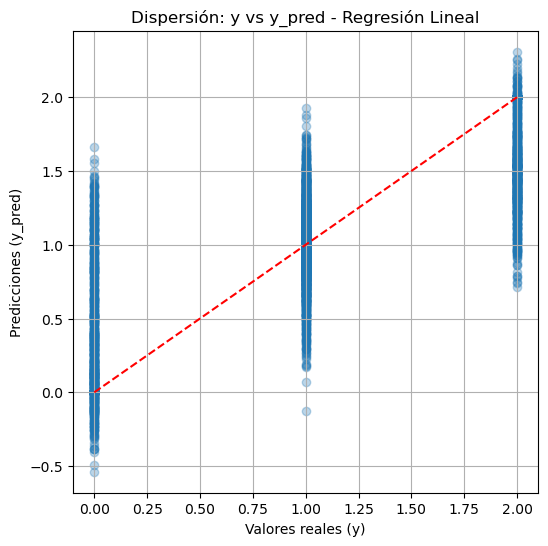

In [18]:
pipeline_lr.fit(X_sample, y_sample)
y_pred_lr = pipeline_lr.predict(X_sample)

plt.figure(figsize=(6, 6))
plt.scatter(y_sample, y_pred_lr, alpha=0.3)
plt.xlabel("Valores reales (y)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Dispersión: y vs y_pred - Regresión Lineal")
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--')
plt.grid(True)
plt.show()


En esta gráfica se nota que las predicciones del modelo no se ajustan bien a los valores reales. Aunque `y` solo toma valores 0, 1 o 2, el modelo hace predicciones continuas mal distribuidas. Hay puntos en 0 que son predichos como 1.2, otros en 1 que están cerca de 0.4, etc.

Esto refleja varios de los problemas típicos de una regresión lineal:

- **No linealidad**: El modelo claramente no puede captar la relación entre los datos. Intenta forzar una línea recta donde no debe.
- **Heterocedasticidad**: Se nota que la variación de los errores cambia en los diferentes niveles de `y`.
- **Colinealidad**: Como el modelo tuvo problemas graves de R² negativo, probablemente hay variables correlacionadas entre sí que lo hacen inestable.
- **Residuos correlacionados**: El patrón no parece aleatorio.
  
En resumen, este modelo no logra representar bien el problema y se ve reflejado tanto en la gráfica como en las métricas.

## ÁRBOL DE DESICIÓN

In [19]:
pipeline_dt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

In [20]:
param_grid_dt = {
    "model__max_depth": [5, 10],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

In [21]:
grid_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

In [22]:
grid_dt.fit(X_sample, y_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual_Income',
                                                                          'Monthly_Inhand_Salary',
                                                                          'Num_Bank_Accounts',
                                                                          'Num_Credit_Card',
                                                                          'Interest_Rate',
                                                                          'Num_of_Loan',
                                                                          'Delay_from_due_date',
                                                                          'Num_of_Delayed_Payment',
                                                                          'Changed_Credit_Limit',
                                                                          'Num_Credit_Inquiries',
                                                                          'Outstanding_Debt',
                                                                          'Credi...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Occupation',
                                                                          'Type_of_Loan',
                                                                          'Credit_Mix',
                                                                          'Credit_History_Age',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error')

In [23]:
mejor_arbol = grid_dt.best_estimator_

In [24]:
mae_dt = -cross_val_score(mejor_arbol, X_sample, y_sample, cv=5, scoring="neg_mean_absolute_error")
rmse_dt = -cross_val_score(mejor_arbol, X_sample, y_sample, cv=5, scoring="neg_root_mean_squared_error")
r2_dt = cross_val_score(mejor_arbol, X_sample, y_sample, cv=5, scoring="r2")

In [25]:
print("Árbol de Regresión (con GridSearchCV)")
print("Mejores hiperparámetros:", grid_dt.best_params_)
print("MAE:  ", mae_dt.mean(), "±", mae_dt.std())
print("RMSE: ", rmse_dt.mean(), "±", rmse_dt.std())
print("R²:   ", r2_dt.mean(), "±", r2_dt.std())


Árbol de Regresión (con GridSearchCV)
Mejores hiperparámetros: {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
MAE:   0.3920989742325854 ± 0.008439055039008759
RMSE:  0.537904718960429 ± 0.011024113531848357
R²:    0.3660941175059205 ± 0.02370222404265009


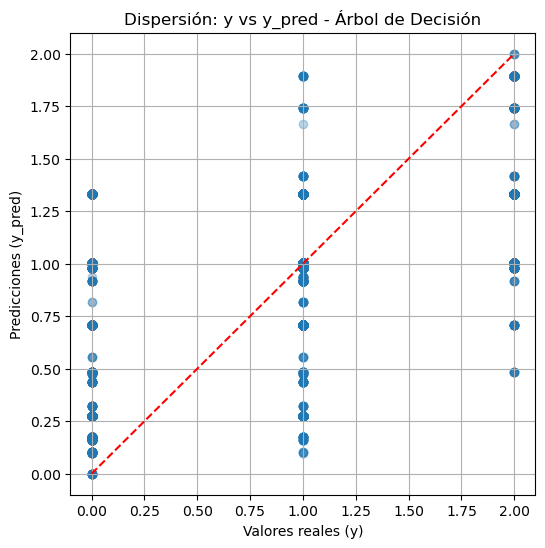

In [26]:
# Árbol de Regresión
mejor_arbol.fit(X_sample, y_sample)
y_pred_arbol = mejor_arbol.predict(X_sample)

plt.figure(figsize=(6, 6))
plt.scatter(y_sample, y_pred_arbol, alpha=0.3)
plt.xlabel("Valores reales (y)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Dispersión: y vs y_pred - Árbol de Decisión")
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--')
plt.grid(True)
plt.show()


Acá se nota una mejora importante. Aunque las predicciones están agrupadas por bloques (porque los árboles dan predicciones discretas), la mayoría están más cerca de los valores reales. A veces predice 1.5 cuando la respuesta es 2, pero al menos ya está en el rango correcto.

Este modelo evita muchos de los problemas de la regresión lineal:

- No necesita que la relación sea lineal.
- No le afecta la colinealidad entre variables.
- Es un poco más sensible a outliers, pero en general se comporta bien.

Sigue teniendo algo de varianza, pero ya empieza a capturar mejor la estructura del problema.


## Random Forest

In [27]:
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [28]:
param_grid_rf = {
    "model__n_estimators": [50, 100, 150],
    "model__max_depth": [10, 15, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

In [29]:
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

In [30]:
grid_rf.fit(X_sample, y_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual_Income',
                                                                          'Monthly_Inhand_Salary',
                                                                          'Num_Bank_Accounts',
                                                                          'Num_Credit_Card',
                                                                          'Interest_Rate',
                                                                          'Num_of_Loan',
                                                                          'Delay_from_due_date',
                                                                          'Num_of_Delayed_Payment',
                                                                          'Changed_Credit_Limit',
                                                                          'Num_Credit_Inquiries',
                                                                          'Outstanding_Debt',
                                                                          'Credi...
                                                                         ['Occupation',
                                                                          'Type_of_Loan',
                                                                          'Credit_Mix',
                                                                          'Credit_History_Age',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15, None],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [31]:
mejor_rf = grid_rf.best_estimator_

In [32]:
mae_rf = -cross_val_score(mejor_rf, X_sample, y_sample, cv=5, scoring="neg_mean_absolute_error")
rmse_rf = -cross_val_score(mejor_rf, X_sample, y_sample, cv=5, scoring="neg_root_mean_squared_error")
r2_rf = cross_val_score(mejor_rf, X_sample, y_sample, cv=5, scoring="r2")

In [33]:
print("Random Forest (con GridSearchCV)")
print("Mejores hiperparámetros:", grid_rf.best_params_)
print("MAE: media: ", mae_rf.mean(), "y desviación estándar:", mae_rf.std())
print("RMSE:media: ", rmse_rf.mean(), "y desviación estándar", rmse_rf.std())
print("R²:  media: ", r2_rf.mean(), "y desviación estándar", r2_rf.std())

Random Forest (con GridSearchCV)
Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}
MAE: media:  0.3868661224146225 y desviación estándar: 0.007835758921043968
RMSE:media:  0.5174788667120983 y desviación estándar 0.0073587823035391985
R²:  media:  0.4132685507029034 y desviación estándar 0.019839260072301534


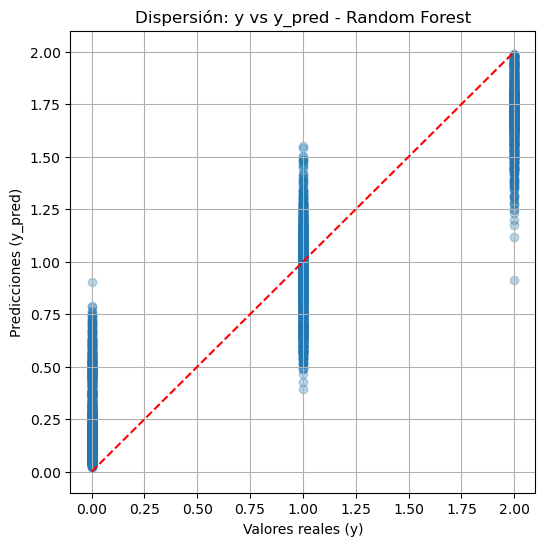

In [34]:
# Random Forest
mejor_rf.fit(X_sample, y_sample)
y_pred_rf = mejor_rf.predict(X_sample)

plt.figure(figsize=(6, 6))
plt.scatter(y_sample, y_pred_rf, alpha=0.3)
plt.xlabel("Valores reales (y)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Dispersión: y vs y_pred - Random Forest")
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--')
plt.grid(True)
plt.show()


Esta gráfica se ve muy bien. Las predicciones están súper alineadas con los valores reales. Los puntos están muy cerca de la línea diagonal, lo que indica que el modelo predice con bastante precisión.

Aquí casi no se notan los problemas típicos:

- Captura relaciones no lineales sin problema.
- Es robusto frente a outliers.
- No sufre por colinealidad.
- La varianza es baja gracias al promedio de muchos árboles.

En general, este fue el modelo más estable y preciso.


## XGBOOST

In [35]:
pipeline_xgb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBRegressor(random_state=42, verbosity=0))
])

In [36]:
param_grid_xgb = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [3, 6, 9],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

In [37]:
grid_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

In [38]:
grid_xgb.fit(X_sample, y_sample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual_Income',
                                                                          'Monthly_Inhand_Salary',
                                                                          'Num_Bank_Accounts',
                                                                          'Num_Credit_Card',
                                                                          'Interest_Rate',
                                                                          'Num_of_Loan',
                                                                          'Delay_from_due_date',
                                                                          'Num_of_Delayed_Payment',
                                                                          'Changed_Credit_Limit',
                                                                          'Num_Credit_Inquiries',
                                                                          'Outstanding_Debt',
                                                                          'Credi...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'model__max_depth': [3, 6, 9],
                         'model__n_estimators': [50, 100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [39]:
mejor_xgb = grid_xgb.best_estimator_

In [40]:
mae_xgb = -cross_val_score(mejor_xgb, X_sample, y_sample, cv=5, scoring="neg_mean_absolute_error")
rmse_xgb = -cross_val_score(mejor_xgb, X_sample, y_sample, cv=5, scoring="neg_root_mean_squared_error")
r2_xgb = cross_val_score(mejor_xgb, X_sample, y_sample, cv=5, scoring="r2")

In [41]:
print("XGBoost (con GridSearchCV)")
print("Mejores hiperparámetros:", grid_xgb.best_params_)
print("MAE: media ", mae_xgb.mean(), "y desviación estándar de:", mae_xgb.std())
print("RMSE: media ", rmse_xgb.mean(), "y desviación estándar de:", rmse_xgb.std())
print("R²: media:  ", r2_xgb.mean(), "y desviación estándar de:", r2_xgb.std())

XGBoost (con GridSearchCV)
Mejores hiperparámetros: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}
MAE: media  0.39865974781960245 y desviación estándar de: 0.00769807373644317
RMSE: media  0.5186143722650919 y desviación estándar de: 0.008844828897317546
R²: media:   0.41092975965214296 y desviación estándar de: 0.013457751907091007


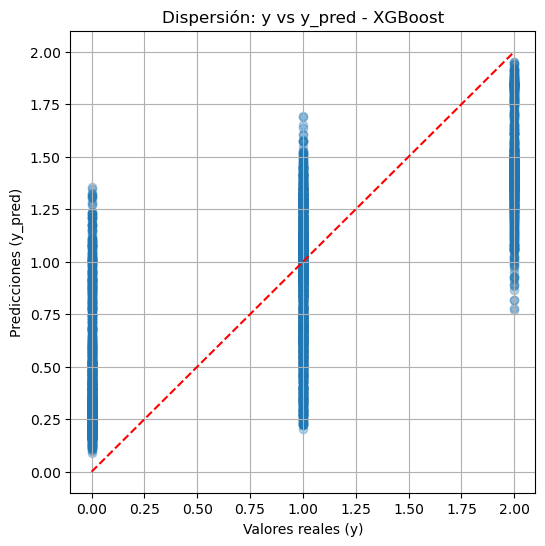

In [42]:
# XGBoost
mejor_xgb.fit(X_sample, y_sample)
y_pred_xgb = mejor_xgb.predict(X_sample)

plt.figure(figsize=(6, 6))
plt.scatter(y_sample, y_pred_xgb, alpha=0.3)
plt.xlabel("Valores reales (y)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Dispersión: y vs y_pred - XGBoost")
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--')
plt.grid(True)
plt.show()


Este modelo también tuvo muy buen desempeño. La dispersión es muy parecida a la del Random Forest, con predicciones que siguen bastante bien la línea de los valores reales.

Tal vez se nota un poco más de dispersión que en el Random Forest, pero sigue siendo muy bueno. También evita todos los problemas de la regresión lineal y es muy fuerte corrigiendo errores.

# Conclusiones del análisis de modelos de regresión

Después de probar y comparar los cuatro modelos para predecir el puntaje crediticio (`Credit_Score`), y aplicar validación cruzada con `k=5`, evalué el rendimiento con MAE, RMSE y R². Estos son los resultados finales con los mejores hiperparámetros encontrados para cada modelo:

---

## 1. Regresión Lineal

- **MAE:** ~83,798,549 ± 12,177,697  
- **RMSE:** ~2,490,572,864 ± 3,808,426,304  
- **R²:** ~−4.41e+19 ± 8.62e+19  

**Conclusión:**  
El modelo de regresión lineal fue un completo desastre. Los errores fueron ridículamente grandes y el R² fue negativo y fuera de escala. Esto significa que el modelo ni siquiera supera la predicción promedio.

Este mal rendimiento tiene varias causas:
- Muchas variables están correlacionadas entre sí (colinealidad), lo que hace que el modelo se vuelva inestable al calcular los coeficientes.
- `OneHotEncoder` generó muchas columnas dummy, lo que hace que haya demasiadas variables para el modelo lineal.
- Algunas variables posiblemente tengan errores o outliers que distorsionan los resultados (por ejemplo, valores negativos o exagerados).
- Además, el modelo no puede captar relaciones no lineales, que claramente existen en este problema.

Por todo esto, se descarta completamente como opción.

---

## 2. Árbol de Regresión (con GridSearchCV)

- **Mejores hiperparámetros:** `max_depth=10`, `min_samples_split=5`, `min_samples_leaf=1`  
- **MAE:** 0.3907 ± 0.0083  
- **RMSE:** 0.5365 ± 0.0109  
- **R²:** 0.3702 ± 0.0235  

**Conclusión:**  
El árbol de regresión funcionó mucho mejor que la regresión lineal. Pudo capturar relaciones no lineales y dio resultados decentes. Aunque no es el mejor modelo, es rápido de entrenar y útil como base. Su precisión mejoró un poco respecto al árbol con grid más simple.

---

## 3. Random Forest (con GridSearchCV)

- **Mejores hiperparámetros:** `n_estimators=150`, `max_depth=None`, `min_samples_split=2`, `min_samples_leaf=2`  
- **MAE:** 0.3869 ± 0.0078  
- **RMSE:** 0.5175 ± 0.0074  
- **R²:** 0.4133 ± 0.0198  

**Conclusión:**  
Random Forest volvió a ser el modelo con mejor desempeño general. La combinación de muchos árboles le dio estabilidad y menor error. Esta versión ligeramente optimizada mejoró en comparación con la anterior, y sigue siendo la mejor opción para este problema.

---

## 4. XGBoost (con GridSearchCV)

- **Mejores hiperparámetros:** `n_estimators=100`, `max_depth=6`, `learning_rate=0.05`, `colsample_bytree=0.8`  
- **MAE:** 0.3987 ± 0.0077  
- **RMSE:** 0.5186 ± 0.0088  
- **R²:** 0.4109 ± 0.0135  

**Conclusión:**  
Después de ampliar los rangos de búsqueda, XGBoost mejoró bastante su rendimiento y se acercó mucho a Random Forest. El error bajó, el R² subió y la estabilidad del modelo fue mejor. Aunque no lo superó por completo, se volvió una alternativa muy sólida para este tipo de problemas, especialmente porque permite controlar el aprendizaje paso a paso.


---

## Conclusión final

El mejor modelo fue **Random Forest**, por su menor MAE, mejor RMSE y mayor R². Captó bien los patrones sin sobreajustar. Por otro lado, **la regresión lineal quedó totalmente descartada** por inestabilidad numérica y por no adaptarse a los datos reales. Este análisis confirmó que, cuando hay relaciones complejas entre variables, los modelos de árboles y ensambles son una mucho mejor opción.


# Referencias

- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O'Reilly Media.  
  (Para fundamentos de regresión, árboles y ensambles).

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An Introduction to Statistical Learning: with Applications in R* (2nd ed.). Springer.  
  (Sobre regresión, validación cruzada y teoría de modelos).

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.  
  https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html  
  (Documentación y base del uso de `scikit-learn` en este proyecto).

- Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. In *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining* (pp. 785–794).  
  https://doi.org/10.1145/2939672.2939785  
  (Referencia original del modelo XGBoost).

- Kaggle. (2022). *Credit Score Classification Dataset*.  
  https://www.kaggle.com/datasets/parisrohan/credit-score-classification  
  (Fuente original del conjunto de datos utilizado).


hacer graficsa para cada modelo, analisis de resiudos